<h1> <p style="text-align: center;"> Определение перспективного тарифа для телеком-компании </p> </h1>
<h3> Содержание </h3>
<div class="toc"><ol class="toc-item">
    <li> Изучение данных из файлов и их предобработка</li>
    <li> Расчёты и добавление результатов в таблицу </li>
    <li> Анализ данных </li>
    <li> Проверка гипотез </li>
    <li> Общий вывод </li>
</ol></div>

In [1]:
import pandas as pd
import math
import datetime as dt
import numpy as np 
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Изучение данных из файлов и их предобработка

Откроем файлы с данными и изучим общую информацию

In [2]:
# в '' прописываем наименования csv-файлов с даннымизакономерностей
users = pd.read_csv('')
calls = pd.read_csv('')
messages = pd.read_csv('')
internet = pd.read_csv('')
tariffs = pd.read_csv('')

warnings.filterwarnings("ignore")

In [3]:
# у нас есть массив датафреймов
frames = [users, calls, messages, internet, tariffs]

# пропишем функцию для проверки данных на тип данных, дубликаты  и т.п.
def check_df(frame):
    display(frame.info())
    display(frame.head())
    display(frame.duplicated().sum())
    display()

# вызовем функцию в цикле по всем датафреймам
for frame in frames:
    print()
    check_df(frame)
    print()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


0

В датафрейме users сразу обнаруживаем отсутствующие значения в колонке churn_date,в условии задания было указано, что это дата прекращения пользования тарифом, а если значение пропущено, то тариф ещё действовал на момент выгрузки данных.
Поскольку данные представлены за 2018 год, можем заменить пропущенные значения на последний день 2018 года - 31.12.2018.

In [4]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

Приведём данные в колонках churn_date, reg_date датафрейма users к формату дата-время..

In [5]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Данные в колонках call_date, message_date, session_date также приведём к формату дата-фремя и выделим в отдельную колонку месяц, так как в дальнейшем все рассчёты будем вести по месяцам. 

In [6]:
def date_month(df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
    df['month'] = df[column].dt.month

date_month(df = calls, column = 'call_date')
date_month(df = messages, column = 'message_date')
date_month(df = internet, column = 'session_date')

Из примечаний к данным по проекту, мы знаем, что «Мегалайн» всегда округляет секунды до минут,а каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. 
Таким образом, нам нужно округлить длительность каждого звонка до целых минут, для этого напишем функцию и обновим информацию в столбце duration.

In [7]:
def calls_duration(row):
    duration = row['duration']
    return math.ceil(duration) 

calls['duration'] = calls.apply(calls_duration, axis=1)

Из примечаний к данным по проекту мы значем, что «Мегалайн» всегда округляет мегабайты — до гигабайт.
При этом для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
Поэтому для начала нам нужно подсчитать общее количество мегабайт, потраченных пользователем за месяц, сделаем это с помощью сводной таблицы, далее переведём сумму мегабайтов за месяц в гигабайты с округлением в бОльшую сторону, напишем такую функцию.

In [8]:
internet = internet.pivot_table(index =['user_id','month'], values='mb_used', aggfunc='sum')

def gb_used(row):
    mb_used = row['mb_used']
    gb_used = math.ceil(mb_used /1024)
    return gb_used

internet['gb_used'] = internet.apply(gb_used, axis=1)

Теперь можно приступить к созданию общего датафрейма по пользователям с указанием о  количестве совершённых ими звонков, написанных сообщений и потраченном трафике помесячно.
Для удобства, с помощью сводных таблиц к датафреймам calls, messages, internet подсчитаем для каждого пользователя помесячно:
- количество звонков 
- сумму минут
- количество отправленных сообщений 
- количество потраченных гигабайт 

Сразу приведём данные в получившихся колонках calls_quantity, calls_duration, messages_quantity, gb_used к целочисленному типу, чтобы данные занимали меньше памяти и для удобства дальнейших подсчётов.

Далее объединим получившиеся датафреймы calls, messages, internet с уже имеющимся датафреймом users, назовём его cost_details.

In [9]:
calls = calls.pivot_table(index =['user_id', 'month'], values='duration', aggfunc=['count','sum']).reset_index()
calls.columns = ['user_id', 'month','calls_quantity', 'calls_duration'] 
calls[['calls_quantity','calls_duration']] = calls[['calls_quantity','calls_duration']].astype(int)

In [10]:
messages= messages.pivot_table(index =['user_id','month'], values='id', aggfunc='count').reset_index()
messages.columns = ['user_id', 'month','messages_quantity'] 
messages['messages_quantity'] = messages['messages_quantity'].astype(int)

In [11]:
internet = internet.pivot_table(index =['user_id','month'], values='gb_used', aggfunc='sum').reset_index()
internet['gb_used'] = internet['gb_used'].astype(int)

In [12]:
cost_details = internet.merge(calls, on=['user_id','month'], how='outer')
cost_details = cost_details.merge(messages, on=['user_id','month'], how='outer')
cost_details = users.merge(cost_details, how='outer')
cost_details.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,gb_used,calls_quantity,calls_duration,messages_quantity
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,3.0,22.0,159.0,22.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23.0,43.0,172.0,60.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,14.0,47.0,340.0,75.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,14.0,52.0,408.0,81.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,15.0,58.0,466.0,57.0


Изучим информацию о получившемся датафрейме cost_details более внимательно.

In [13]:
cost_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            3216 non-null   int64         
 1   age                3216 non-null   int64         
 2   churn_date         3216 non-null   datetime64[ns]
 3   city               3216 non-null   object        
 4   first_name         3216 non-null   object        
 5   last_name          3216 non-null   object        
 6   reg_date           3216 non-null   datetime64[ns]
 7   tariff             3216 non-null   object        
 8   month              3214 non-null   float64       
 9   gb_used            3203 non-null   float64       
 10  calls_quantity     3174 non-null   float64       
 11  calls_duration     3174 non-null   float64       
 12  messages_quantity  2717 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory us

Обнаружили пропуски в колонках month, gb_used, calls_quantity, calls_duration, messages_quantity.
Очевидно строки, где пропущен месяц можно просто удалить из датафрейма, так как пользователь просто ещё не был пользователем "Мегалайн".

Отстутствующие данные в колонках gb_used, calls_quantity, calls_duration, messages_quantity заменим на 0, так как пользователем просто не звонил, не писал сообщения и не пользовался интернетом в какие-то определённые месяцы, раз данных нет, т.е. либо он был в отпуске, либо только-только подключился к тарифу в самом конце месяца.

Также проверим датафрейм на явные дубликаты.

In [14]:
cost_details = cost_details.dropna(subset=['month'])

In [15]:
cost_details[['gb_used','calls_quantity', 'calls_duration','messages_quantity']] = cost_details[['gb_used','calls_quantity', 'calls_duration','messages_quantity']].fillna(0)
cost_details[['month', 'gb_used','calls_quantity', 'calls_duration','messages_quantity']] = cost_details[['month', 'gb_used','calls_quantity', 'calls_duration','messages_quantity']].astype(int)

In [16]:
cost_details.duplicated().sum()

0

Ещё раз посмотрим на получившийся для работы датафрейм cost_details, чтобы убедиться, что с ним всё в порядке и он пригоден для дальнейших подсчётов.

In [17]:
cost_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            3214 non-null   int64         
 1   age                3214 non-null   int64         
 2   churn_date         3214 non-null   datetime64[ns]
 3   city               3214 non-null   object        
 4   first_name         3214 non-null   object        
 5   last_name          3214 non-null   object        
 6   reg_date           3214 non-null   datetime64[ns]
 7   tariff             3214 non-null   object        
 8   month              3214 non-null   int64         
 9   gb_used            3214 non-null   int64         
 10  calls_quantity     3214 non-null   int64         
 11  calls_duration     3214 non-null   int64         
 12  messages_quantity  3214 non-null   int64         
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 351.5+ 

Теперь рассмотрим датафрейм tariffs

In [18]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Переведём данные в колонке mb_per_month_included в гигабайты, присвоим ему целочисленный тип данных  и ,соответственно, переименуем этот столбец в gb_per_month_included.

In [19]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included']/1024).astype(int)
tariffs = tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   gb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Итак, мы получили два обработанных датафрейма cost_details и tariffs для дальнейшего анализа, полученные на основании данных, предоставленных компанией "Мегалайн" по пользователям двух тарифных планов: «Смарт» и «Ультра». 

## Расчёты и добавление результатов в таблицу

Мы уже посчитали для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;

Теперь вычислим помесячную выручку с каждого пользователя, для этого сначала посчитаем для каждого пользователя помесячно расходы сверх тарифных пакетов:
- стоимость дополнительных минут (колонка add_calls_cost таблицы cost_details) 
- стоимость дополнительных сообщений (колонка add_messages_cost таблицы cost_details)
- стоимость допольнительного интернет-трафика (колонка add_gb_cost таблицы cost_details)

Далее к стоимости расходов сверх тарифных пакетов прибавим абонентскую плату, соответствующую тарифному плану и запишем эту сумму в колонку total_cost таблицы cost_details.

In [20]:
def add_calls_cost(row):
    tariff = row['tariff']
    calls_duration = row['calls_duration']
    if tariff == 'smart' and calls_duration > tariffs['minutes_included'][0]:
        return (calls_duration - tariffs['minutes_included'][0])*tariffs['rub_per_minute'][0]
    elif tariff == 'ultra' and calls_duration > tariffs['minutes_included'][1]:
        return (calls_duration - tariffs['minutes_included'][1])*tariffs['rub_per_minute'][1]
    else:
        return 0
                   
cost_details['add_calls_cost'] = cost_details.apply(add_calls_cost, axis=1)

In [21]:
def add_messages_cost(row):
    tariff = row['tariff']
    messages_quantity = row['messages_quantity']
    if tariff == 'smart' and messages_quantity > tariffs['messages_included'][0]:
        return (messages_quantity - tariffs['messages_included'][0])*tariffs['rub_per_message'][0]
    elif tariff == 'ultra' and messages_quantity > tariffs['messages_included'][1]:
        return (messages_quantity - tariffs['messages_included'][1])*tariffs['rub_per_message'][1]
    else:
        return 0
                   
cost_details['add_messages_cost'] = cost_details.apply(add_messages_cost, axis=1)

In [22]:
def add_gb_cost(row):
    tariff = row['tariff']
    gb_used = row['gb_used']
    if tariff == 'smart' and gb_used > tariffs['gb_per_month_included'][0]:
        return (gb_used - tariffs['gb_per_month_included'][0])*tariffs['rub_per_gb'][0]
    elif tariff == 'ultra' and gb_used > tariffs['gb_per_month_included'][1]:
        return (gb_used - tariffs['gb_per_month_included'][1])*tariffs['rub_per_gb'][1]
    else:
        return 0
                   
cost_details['add_gb_cost'] = cost_details.apply(add_gb_cost, axis=1)

In [23]:
def total_cost(row):
    tariff = row['tariff']
    add_gb_cost = row['add_gb_cost'] 
    add_messages_cost = row['add_messages_cost'] 
    add_calls_cost = row['add_calls_cost']
    if tariff == 'smart':
        return (add_gb_cost + add_messages_cost + add_calls_cost + tariffs['rub_monthly_fee'][0])
    else:
        return (add_gb_cost + add_messages_cost + add_calls_cost + tariffs['rub_monthly_fee'][1])
                   
cost_details['total_cost'] = cost_details.apply(total_cost, axis=1)

In [24]:
cost_details.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,gb_used,calls_quantity,calls_duration,messages_quantity,add_calls_cost,add_messages_cost,add_gb_cost,total_cost
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,3,22,159,22,0,0,0,1950
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23,43,172,60,0,0,0,1950
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14,47,340,75,0,0,0,1950
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14,52,408,81,0,0,0,1950
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,15,58,466,57,0,0,0,1950


## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. 
Сначала оценим с помощью функции describe оценим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

In [25]:
cost_details.query('tariff =="smart"')[['calls_duration','messages_quantity','gb_used']].describe().T

,count,mean,std,min,25%,50%,75%,max
calls_duration,2229.0,417.934948,190.313730,0.0,282.0,422.0,545.0,1435.0
messages_quantity,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0
gb_used,2229.0,16.328847,5.747061,0.0,13.0,17.0,20.0,38.0


In [26]:
cost_details.query('tariff =="ultra"')[['calls_duration','messages_quantity','gb_used']].describe().T

,count,mean,std,min,25%,50%,75%,max
calls_duration,985.0,526.623350,317.606098,0.0,284.0,518.0,752.0,1673.0
messages_quantity,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0
gb_used,985.0,19.494416,9.853511,0.0,12.0,19.0,27.0,49.0


In [27]:
tariffs.head()

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


Итак, в нашей выборке оказалось больше пользователей тарифа smart, чем ultra. При этом как минимум 50% пользователей платят за дополнительный интернет при тарифе smart. В среднем пользователям данного тарифа достаточно 418 минут разговоров, 34 сообщений и 17 гб интернета в месяц. Тарифом ultra пользуется почти в 2,3 раза меньше людей из выборки, при этом 75% пользователей не нуждаются в каких-либо дополнительных минутах, сообщениях и гигабайтах, эти 75% укладываются в лимиты по своему тарифу. В среднем пользователям тарифа ultra достаточно 527 минут разговоров, 50 сообщений и 20 гб в месяц.

Отдельно посчитаем медианные значения и дисперсии, дополним таблицу также стандартными отклонениямии средними зачениями для наглядности

In [28]:
cost_details.pivot_table(index = 'tariff', values = ['calls_duration', 'messages_quantity', 'gb_used'], aggfunc = ['mean','median','var','std'])

mean                                      median          \
       calls_duration    gb_used messages_quantity calls_duration gb_used   
tariff                                                                      
smart      417.934948  16.328847         33.384029            422      17   
ultra      526.623350  19.494416         49.363452            518      19   

                                    var                               \
       messages_quantity calls_duration    gb_used messages_quantity   
tariff                                                                 
smart                 28   36219.315784  33.028705        796.812958   
ultra                 38  100873.633397  97.091686       2285.266143   

                  std                              
       calls_duration   gb_used messages_quantity  
tariff                                             
smart      190.313730  5.747061         28.227876  
ultra      317.606098  9.853511         47.804457

Несмотря на то, что пользователей с тарифом smart почти в 2,3 больше, чем пользователей с тарифом ultra, разброс данных относительно средних показателей по длительности разговоров, количеству сообщений и гигабайт в месяц среди пользователей с тарифом ultra в разы больше, отсюда можем сделать вывод, что публика, пользующаяся тарифом ultra - более разношёрстная.

При этом относительная близость средних и медианных значений говорит нам о том, что распределение пользователей внутри каждого тарифа близко к нормальному, просто, скорее всего для пользователей тарифа smart "хвосты" распределения будут короче, чем для пользователей тарифа ultra, тут "хвосты" будут длинее, т.е. встретятся как пользователи, которые значительно выходят за рамки лимитов по тарифу, так и те, кто даже на самый минимум его не исчерпывает.
Также можем обратить внимание на то, данные по количеству потраченных минут и гигабайт интернета среди пользователей тарифа smart немного скошены вправо(медиана выше среднего), а данные по количеству отправленных сообщений, наоборот, немного скошены влево (медиана ниже среднего),что означает, что чуть бОльшая часть пользователей тарифа smart тяготеет к телефонным разговорам, а не к перепискам.
Среди пользователей тарифа ultra наблюдается другая картина: данные по количеству минут, гигабайт и сообщений скошены влево (медиана ниже среднего.

Стандартное отклонение показывает нам, как далеко от среднего значения находятся точки данных: чем меньше стандартное отклонение, тем более «сгруппированы» данные вокруг среднего, чем отклонение больше, тем больше разброс значений.
Очевидно, что среди пользователей тарифа smart разброс значений в 1,6-1,7 раз меньше, чем среди пользователей тарифа ultra.

Строим гистограммы по среднему количеству минут, сообщений и гигабайт пользователей тарифа smart:

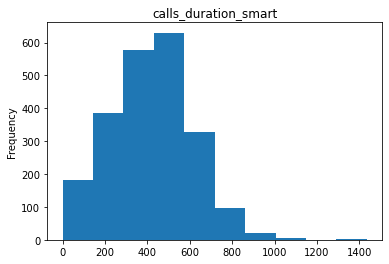

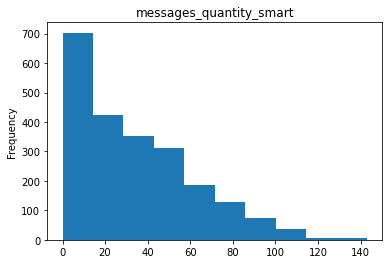

<AxesSubplot:title={'center':'gb_used_smart'}, ylabel='Frequency'>

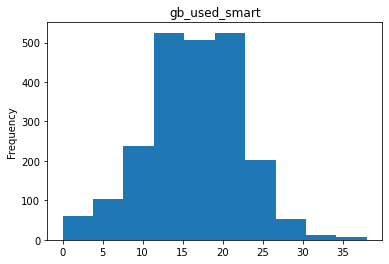

In [29]:
cost_details.query('tariff =="smart"')['calls_duration'].plot(kind='hist', title='calls_duration_smart')
plt.show()
cost_details.query('tariff =="smart"')['messages_quantity'].plot(kind='hist', title='messages_quantity_smart')
plt.show()
cost_details.query('tariff =="smart"')['gb_used'].plot(kind='hist', title='gb_used_smart')

Как и предполагали по результатам расчётов средних, медианных значений, гистограммы количества минут и гигабайт близки к нормальным распределениям, а вот диаграмма по количеству сообщений показывает планомерное снижение количества пользователей, которые вообще пользуются таким средством коммуникации, как сообщения, очевидно, что сейчас люди чаще пользуются мессенджерами,на которые тратится интернет, а не обычными смс-ками. Из гистограмм мы видим, что наибольшее количество пользователей выговаривает примерно от 300 до 600 минут, в пользовании интеренетом видим два пика - 12-15 гб и 20-22? гб, очевидно, что как минимум половине пользователей тарифа smart не хватает лимита гигабайт, предложенного "Мегалайном" для данного тарифа.

Строим гистограммы по среднему количеству минут, сообщений и гигабайт пользователей тарифа ultra:

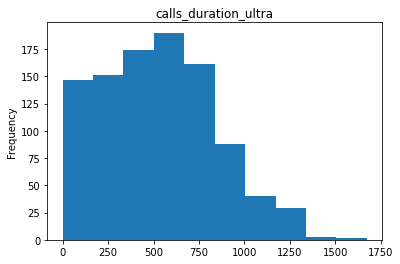

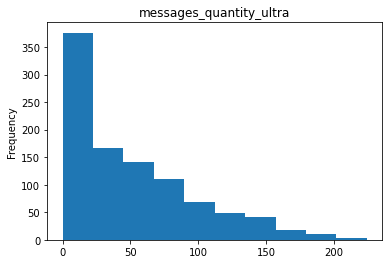

<AxesSubplot:title={'center':'gb_used_ultra'}, ylabel='Frequency'>

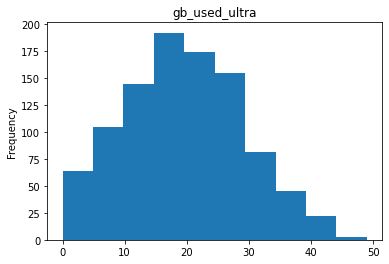

In [30]:
cost_details.query('tariff =="ultra"')['calls_duration'].plot(kind='hist', title='calls_duration_ultra')
plt.show()
cost_details.query('tariff =="ultra"')['messages_quantity'].plot(kind='hist', title='messages_quantity_ultra')
plt.show()
cost_details.query('tariff =="ultra"')['gb_used'].plot(kind='hist', title='gb_used_ultra')

Большинство пользователей тарифа ultra не тратят больше 800 минут в месяц, смс-ками также пользуюся совсем немногие, интернет трафик - также в пределах предложенного по тарифу у большинства пользователей.Получается, что тариф ultra полностью покрывает нужды бОльшинства пользователей в звонках, гигабайтах и сообщениях, порой даже с лихвой.

Text(9.777777777777779, 0.5, 'пользователи, кол-во чел.')

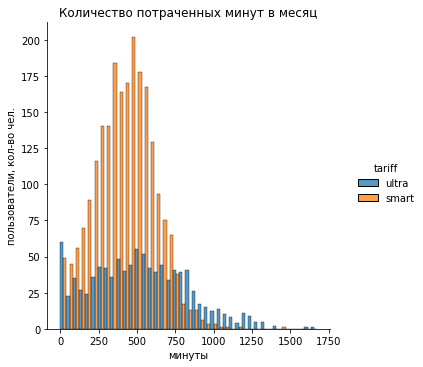

In [31]:
sns.displot(x='calls_duration', hue='tariff', multiple='dodge', data=cost_details)
plt.title('Количество потраченных минут в месяц')
plt.xlabel('минуты')
plt.ylabel('пользователи, кол-во чел.')

Text(9.777777777777779, 0.5, 'пользователи, кол-во чел.')

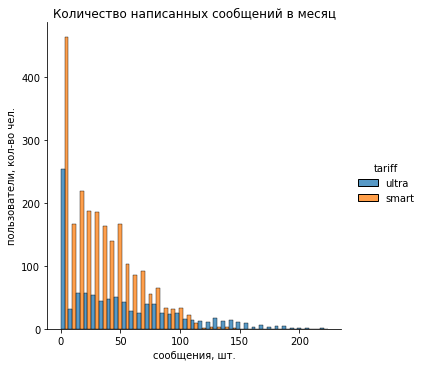

In [32]:
sns.displot(x='messages_quantity', hue='tariff', multiple='dodge', data=cost_details)
plt.title('Количество написанных сообщений в месяц')
plt.xlabel('сообщения, шт.')
plt.ylabel('пользователи, кол-во чел.')

Text(9.777777777777779, 0.5, 'пользователи, кол-во чел.')

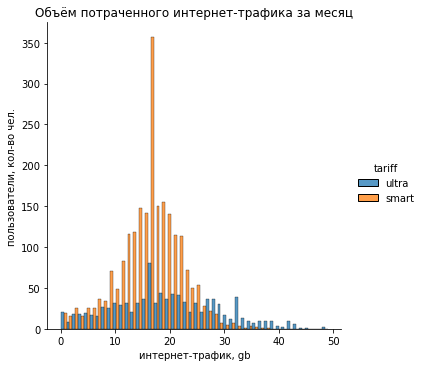

In [33]:
sns.displot(x='gb_used', hue='tariff', multiple='dodge', data=cost_details)
plt.title('Объём потраченного интернет-трафика за месяц')
plt.xlabel('интернет-трафик, gb')
plt.ylabel('пользователи, кол-во чел.')

Text(12.902777777777779, 0.5, 'пользователи, кол-во чел.')

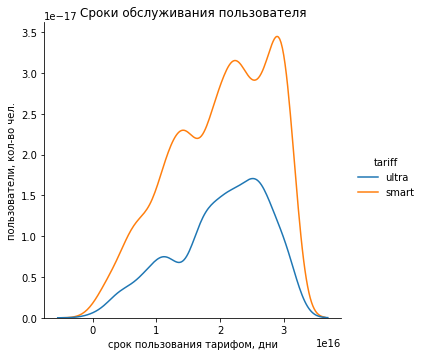

In [34]:
cost_details['user_stability'] = cost_details['churn_date'] - cost_details['reg_date']
cost_details['user_stability'] = pd.to_numeric(cost_details['user_stability'])
sns.displot(x='user_stability', hue='tariff', data=cost_details, kind='kde')
plt.title('Сроки обслуживания пользователя')
plt.xlabel('срок пользования тарифом, дни')
plt.ylabel('пользователи, кол-во чел.')


Text(0, 0.5, 'наименование тарифа')

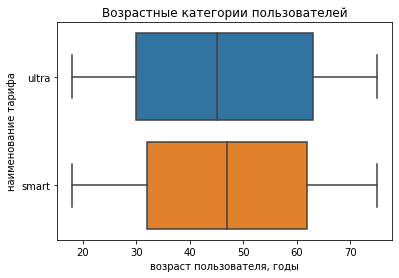

In [35]:
sns.boxplot(x="age", y="tariff", data=cost_details)
plt.title('Возрастные категории пользователей')
plt.xlabel('возраст пользователя, годы')
plt.ylabel('наименование тарифа')


## Проверка гипотез

Проверим первую гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
В данном случае нам нужно сравнивать средние двух генеральных совокупностей между собой. 

Сформулируем нулевую гипотезу H₀ так: «средняя выручка пользователей тарифов "Ультра" равна средней выручке пользователейтарифов "Смарт"».
Исходя из нулевой гипотезы H₀ сформулируем альтернативную гипотезу H₁. Это утверждение, которое принимается верным, если отбрасывается H₀, т.е.в нашем случае оно будет звучать так: «средняя выручка пользователей тарифов "Ультра" не равна средней выручке пользователейтарифов "Смарт"». 

Гипотезу будем проверять специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var), так как наши генеральные совокупности не зависят друг от друга. Для корректного применения данного метода и с учётом того, что размеры выборок у нас отличаются, рассчитаем дисперсии рассматриваемых генеральных совокупностей.

In [36]:
cost_details.pivot_table(index = 'tariff', values = 'total_cost', aggfunc = ['count','var','std'])

,count,var,std
,total_cost,total_cost,total_cost
tariff,,,
smart,2229,669785.708006,818.404367
ultra,985,141516.745079,376.187114


Дисперсии выборок сильно отличаются, таким образом будем указывать equal_var = False при вызове метода scipy.stats.ttest_ind(), в качестве критического уровня статистической значимости зададим alpha=0.05.

In [37]:
ultra_costs = cost_details.query('tariff == "ultra"')['total_cost'] 
smart_costs = cost_details.query('tariff == "smart"')['total_cost'] 
results = st.ttest_ind( ultra_costs, smart_costs, equal_var=False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  4.2606313931076085e-250
Принимаем альтернативную гипотезу


Получается, что в нашем случае нужно принимать альтернативную гипотезу о том, что средняя выручка пользователей тарифов "Ультра" не равна средней выручке пользователейтарифов "Смарт", следовательно, изначальная гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются подтверждена.
На всякий случай, можем дополнительно убедиться в этом, рассчитав средние показатели выручки с помощью функции mean в сводной таблице по тарифам.

In [38]:
cost_details.pivot_table(index='tariff', values='total_cost')

,total_cost
tariff,
smart,1289.973531
ultra,2070.152284


Проверим вторую гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Тут также нужно сравнивать средние двух генеральных совокупностей между собой. 

Сформулируем нулевую гипотезу H₀ так: «средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, т.е. средние выручки равны". Альтернативную гипотезу H₁ сформулируем так: "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, т.е. средние выручки не равны".

Гипотезу будем проверять специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var), так как наши генеральные совокупности не зависят друг от друга. Для корректного применения данного метода также рассчитаем дисперсии рассматриваемых генеральных совокупностей.

In [39]:
variance_moscow = np.var(cost_details.query('city =="Москва"')['total_cost'])
print('Дисперсия средней выручки по Москве', variance_moscow)
variance_others = np.var(cost_details.query('city !="Москва"')['total_cost'])
print('Дисперсия средней выручки в других регионах', variance_others)

Дисперсия средней выручки по Москве 564710.7117467269
Дисперсия средней выручки в других регионах 653886.3270894104


Теперь визуализируем выборки с помощью категориального графика boxplot.

<AxesSubplot:xlabel='Moscow', ylabel='total_cost'>

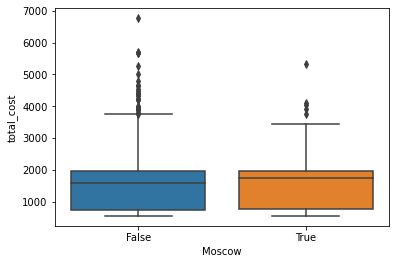

In [40]:
cost_details['Moscow'] = cost_details['city'] == 'Москва'
sns.boxplot(x='Moscow', y='total_cost', data=cost_details)

Из графика можем сделать вывод, что разброс данных в обеих выборках примерно одинаков, в выборке по другим регионам - больше выбросов, чем в выборке по Москве, в Москве медианное значение больше, чем в других регионах, но, в целом, обе медианы больше средних значений.

Теперь визуализируем выборки наложением гистограм для каждой из выборок.

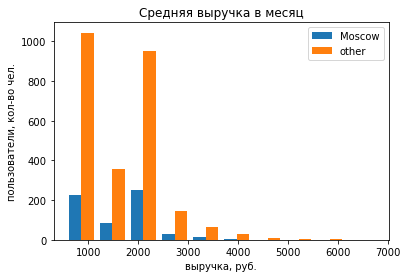

In [41]:
plt.hist([cost_details.query('city=="Москва"')['total_cost'], cost_details.query('city!="Москва"')['total_cost']])
name = ['Moscow', 'other']
plt.title('Средняя выручка в месяц')
plt.xlabel('выручка, руб.')
plt.ylabel('пользователи, кол-во чел.')
plt.legend(labels=name)

 Видим, схожий рисунок изменения выручки, как для Москвы, так и для других регионов.

Как мы помним, дисперсии выборок сильно отличаются, таким образом будем указывать equal_var = False при вызове метода scipy.stats.ttest_ind(), в качестве критического уровня статистической значимости зададим alpha=0.05.

In [42]:
moscow_costs = cost_details.query('city =="Москва"')['total_cost'] 
other_costs = cost_details.query('city !="Москва"')['total_cost'] 
results = st.ttest_ind( moscow_costs, other_costs, equal_var=False)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Опровергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

p-значение:  0.5257376663729298
Не получилось опровергнуть нулевую гипотезу


Итак, нулевую гипотезу о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, опровергнуть не получилось, а значит вторая гипотеза не подтвердилась, и средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов с вероятностью 5%, т.е. в 95% случаев, средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
На всякий случай, также можем дополнительно убедиться в этом, рассчитав средние показатели выручки с помощью функции mean.

In [43]:
cost_details.query('city =="Москва"')['total_cost'].mean()

1546.7135842880523

In [44]:
cost_details.query('city !="Москва"')['total_cost'].mean()

1524.9362274298885

## Общий вывод

В результате проведённого анализа тарифных планов компании «Мегалайн» на выборке 500 пользователей двух различных тарифов, мы смогли оценить поведение клиентов.

Несмотря на то, что пользователей с тарифом smart почти в 2,3 больше, чем пользователей с тарифом ultra, средняя выручка пользователей smart в 1,6 раз меньше, чем средняя выручка пользователей ultra.
При этом, пользователи ultra практически не докупают дополнительные минуты и гигабайты, укладываются в рамки своего тарифного пакета, а пользователи smart в большинстве докупают дополнительные гигабайты помимо ежемесячной абонентской платы.
Практически все пользователи обоих тарифов склонны к меньшему использованию сообщений.

Также в рамках данного анализа, мы проверили две гипотезы о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, и о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Первая гипотеза подтвердилась, выручка пользователей тарифа "Ультра" отличается от вырчки пользователей тарифа "Смарт".
Вторая гипотеза была опровергнута, средняя выручка пользователей из Москвы практически не отличается от выручки пользователей из других регионов.

Основной задачей исследования было определение тарифа, который приносит больше прибыли компании "Мегалайн".
Это тариф "Ультра".